Loading Dependencies

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical,normalize
import matplotlib.pyplot as plt
import cv2
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Loading Data in train and test splits

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Reshaping data and preprocessing

In [27]:
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test = np.array(x_test).reshape(-1,28,28,1)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Plotting processed image

In [ ]:
plt.imshow(x_train[0].reshape(28,28))
print(y_train[0])

Reshaping Feature sets to 1D for ML algorithms

In [20]:
x_train_flat = x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_test_flat = x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))

Testing common ML algorithms

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LSVM', LinearSVC()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
    
accuracy_result = []
names = []

for name, model in models:
    model.fit(x_train_flat, y_train)
    predictions = model.predict(x_test_flat)
    accuracy = accuracy_score(y_test,predictions)
    accuracy_result.append(accuracy)
    names.append(name)
    print("%s: %f" % (name,accuracy))

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR: 0.919700


C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.947900
KNN: 0.961600


C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM: 0.926600
LSVM: 0.917900
GNB: 0.581600
DTC: 0.877300


Converting labels to one-hot vectors for CNN

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Building and training a CNN model

In [5]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding = 'same', input_shape = (28,28,1)  ))
model.add(Activation("relu"))

model.add(Conv2D(32, (5,5), padding = 'same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (28,28,1)  ))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation("relu"))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))



model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size = 120, epochs=10,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.2438 - acc: 0.9226 - val_loss: 0.0474 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.0717 - acc: 0.9783 - val_loss: 0.0324 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0305 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0265 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0388 - acc: 0.9876 - val_loss: 0.0290 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0345 - acc: 0.9900 - val_loss: 0.0260 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0309 - acc: 0.9903 - val_loss: 0.0255 - 

Plotting accuracy and loss graphs

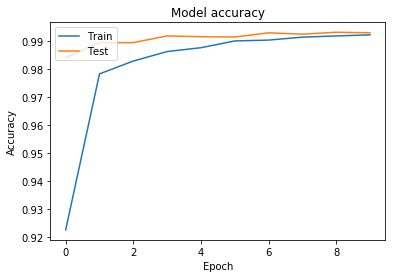

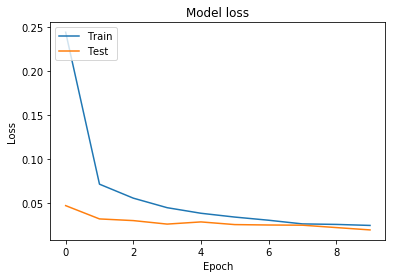

In [6]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()